In [136]:
import io
import numpy as np
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import requests

print('{} version: {}'.format(np.__name__, np.__version__))
print('{} version: {}'.format(pd.__name__, pd.__version__))

numpy version: 1.16.5
pandas version: 0.25.1


In [22]:
url = "https://raw.githubusercontent.com/idandrd/israel-covid19-data/master/CityData.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
#df= pd.read_csv("c:\\position_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 37 columns):
City          272 non-null object
Population    272 non-null object
01/04/2020    23 non-null float64
03/04/2020    153 non-null float64
05/04/2020    187 non-null float64
06/04/2020    189 non-null float64
07/04/2020    190 non-null float64
09/04/2020    190 non-null float64
11/04/2020    190 non-null float64
12/04/2020    190 non-null float64
13/04/2020    190 non-null float64
14/04/2020    190 non-null float64
16/04/2020    190 non-null float64
17/04/2020    190 non-null float64
18/04/2020    190 non-null float64
19/04/2020    190 non-null float64
20/04/2020    190 non-null float64
23/04/2020    188 non-null float64
24/04/2020    190 non-null float64
26/04/2020    190 non-null float64
29/04/2020    190 non-null object
30/04/2020    190 non-null object
01/05/2020    190 non-null object
02/05/2020    190 non-null object
04/05/2020    190 non-null object
05/05/2020    190 non-null o

In [23]:
df.describe()


,01/04/2020,03/04/2020,05/04/2020,06/04/2020,07/04/2020,09/04/2020,11/04/2020,12/04/2020,13/04/2020,14/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,23/04/2020,24/04/2020,26/04/2020
count,23.000000,153.000000,187.000000,189.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,188.000000,190.000000,190.000000
mean,151.304348,40.483660,36.882353,39.534392,40.347368,44.163158,48.363158,50.515789,52.610526,55.878947,59.605263,60.942105,62.121053,63.363158,64.642105,70.319149,71.163158,73.705263
std,200.275591,129.279893,134.677061,146.285298,151.116709,170.230064,188.720587,198.167417,209.151614,225.902613,239.697554,245.303164,250.596159,256.054991,262.943369,296.725885,301.662922,314.821571
min,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000
50%,84.000000,9.000000,6.000000,7.000000,7.000000,7.000000,7.500000,8.500000,9.500000,10.000000,11.000000,11.000000,11.500000,12.000000,12.000000,12.000000,12.500000,14.000000
75%,105.000000,27.000000,24.000000,26.000000,27.000000,27.750000,30.000000,32.750000,34.000000,35.750000,36.000000,37.000000,38.000000,38.000000,39.000000,42.250000,43.000000,43.000000
max,807.000000,1132.000000,1302.000000,1424.000000,1464.000000,1630.000000,1821.000000,1959.000000,2093.000000,2258.000000,2418.000000,2477.000000,2524.000000,2579.000000,2672.000000,3061.000000,3136.000000,3279.000000


In [63]:
df

,City,Population,01/04/2020,03/04/2020,05/04/2020,06/04/2020,07/04/2020,09/04/2020,11/04/2020,12/04/2020,...,08/05/2020,09/05/2020,10/05/2020,15/05/2020,18/05/2020,21/05/2020,24/05/2020,29/05/2020,30/05/2020,02/06/2020
0,ירושלים,"931,272",807.0,1132.0,1302.0,1424.0,1464.0,1630.0,1821.0,1959.0,...,3625,3635,3635,3667,3671,3682,3688,3797,3854,3916
1,תל אביב-יפו,"456,409",301.0,337.0,359.0,387.0,393.0,415.0,444.0,452.0,...,544,546,547,562,566,572,580,600,607,626
2,חיפה,"273,425",81.0,96.0,105.0,106.0,108.0,118.0,127.0,134.0,...,170,170,170,171,171,174,175,175,175,175
3,פתח תקווה,"245,533",111.0,138.0,159.0,167.0,172.0,190.0,199.0,210.0,...,289,290,290,293,296,300,300,305,305,311
4,ראשון לציון,"242,800",119.0,132.0,139.0,149.0,152.0,180.0,192.0,195.0,...,219,219,221,220,222,231,232,234,236,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,מרכז שפירא,"2,083",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,15,15,0
268,הושעיה,2037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
269,גבעת אבני,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
270,מייסר,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-


In [82]:
df.get_dtype_counts()
    
    

C:\Users\evgeny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    18
object     19
dtype: int64

In [129]:
Y=df.loc[201,:]
Y.iloc[[0,1][1]]

' 4,152 '

In [80]:
D=df.iloc[[0,0][:0]]
'getting the data '
D.get_dtype_counts()
    

C:\Users\evgeny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  This is separate from the ipykernel package so we can avoid doing imports until


float64    18
object     19
dtype: int64

In [47]:
Y=df.loc[201,:]
'number of na in a row '
N=Y.isna().sum()
N
#df[df["City"] == 'יבניאל'].index

24

In [95]:

'number of figures which are not na'
F= Y.count()
F

13

In [75]:
G= N+F
G

37

In [134]:
U=Y.keys()
U

Index(['City', 'Population', '01/04/2020', '03/04/2020', '05/04/2020',
       '06/04/2020', '07/04/2020', '09/04/2020', '11/04/2020', '12/04/2020',
       '13/04/2020', '14/04/2020', '16/04/2020', '17/04/2020', '18/04/2020',
       '19/04/2020', '20/04/2020', '23/04/2020', '24/04/2020', '26/04/2020',
       '29/04/2020', '30/04/2020', '01/05/2020', '02/05/2020', '04/05/2020',
       '05/05/2020', '06/05/2020', '08/05/2020', '09/05/2020', '10/05/2020',
       '15/05/2020', '18/05/2020', '21/05/2020', '24/05/2020', '29/05/2020',
       '30/05/2020', '02/06/2020'],
      dtype='object')

In [27]:
K = df.loc[267,:]


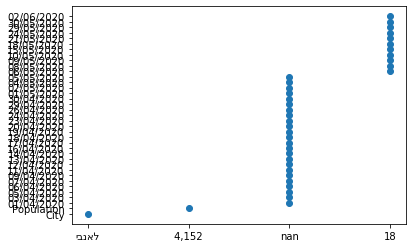

In [137]:
ml=list(Y)

x= np.array(ml)

y= np.array(U)
plt.scatter(x,y)





In [138]:
N=len(x)
print(N)
A=N*np.sum(x*y)
print(A)
B=np.sum(x)
print(B)
C=np.sum(y)
print(C)
E=B*C
F=N*np.sum(x*x)
D=np.sum(x)**2
print(D)
m=(A-B*C)/(F-D)
m
L=(C-m*float(B))/N
print('M is :', m, '\nB is:',L)

37


TypeError: can't multiply sequence by non-int of type 'str'

In [ ]:
plt.scatter(x,y,c='green')
plt.plot(x,m*x+L)plt.scatter(x,y,c='green')
plt.plot(x,m*x+L)

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

regr = linear_model.LinearRegression()
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

regr.fit(X_train, y_train) 
print('Regression Coefficients: {}'.format(regr.coef_[0])) 

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

regr.score(X, y)

In [119]:
for j in Y[0]:
    print(j)  

י
ב
נ
א
ל


In [ ]:
def 